In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data (1).csv


In [ ]:
company = pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
#getting information of dataset
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company.shape

(400, 11)

In [ ]:
company.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [ ]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(company,columns=['Urban','US'], drop_first=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [ ]:
mean_value = df['Sales'].mean()

In [ ]:
#If Sales is more than the mean of the total sales, its a good sale(1). if less then bad sale(0)
df['Sales'] = (df['Sales'] > mean_value).astype(int)

In [ ]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,1,138,73,11,276,120,3,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,3,50,12,1,1


In [ ]:
df = df.drop(['Age','Education'], axis=1)

In [ ]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban_Yes,US_Yes
Sales,1.000000,0.035578,0.123460,0.251910,0.069327,-0.392275,-0.397795,-0.047090,0.142579
CompPrice,0.035578,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.038549,0.066594,0.016869
Income,0.123460,-0.080653,1.000000,0.058995,-0.007877,-0.056698,0.053465,0.037967,0.089601
Advertising,0.251910,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.056552,0.042035,0.684460
Population,0.069327,-0.094707,-0.007877,0.265652,1.000000,-0.012144,0.020614,-0.052025,0.060564
Price,-0.392275,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.050924,0.047016,0.057861
ShelveLoc,-0.397795,-0.038549,0.053465,-0.056552,0.020614,-0.050924,1.000000,0.075404,-0.047378
Urban_Yes,-0.047090,0.066594,0.037967,0.042035,-0.052025,0.047016,0.075404,1.000000,0.047085
US_Yes,0.142579,0.016869,0.089601,0.684460,0.060564,0.057861,-0.047378,0.047085,1.000000


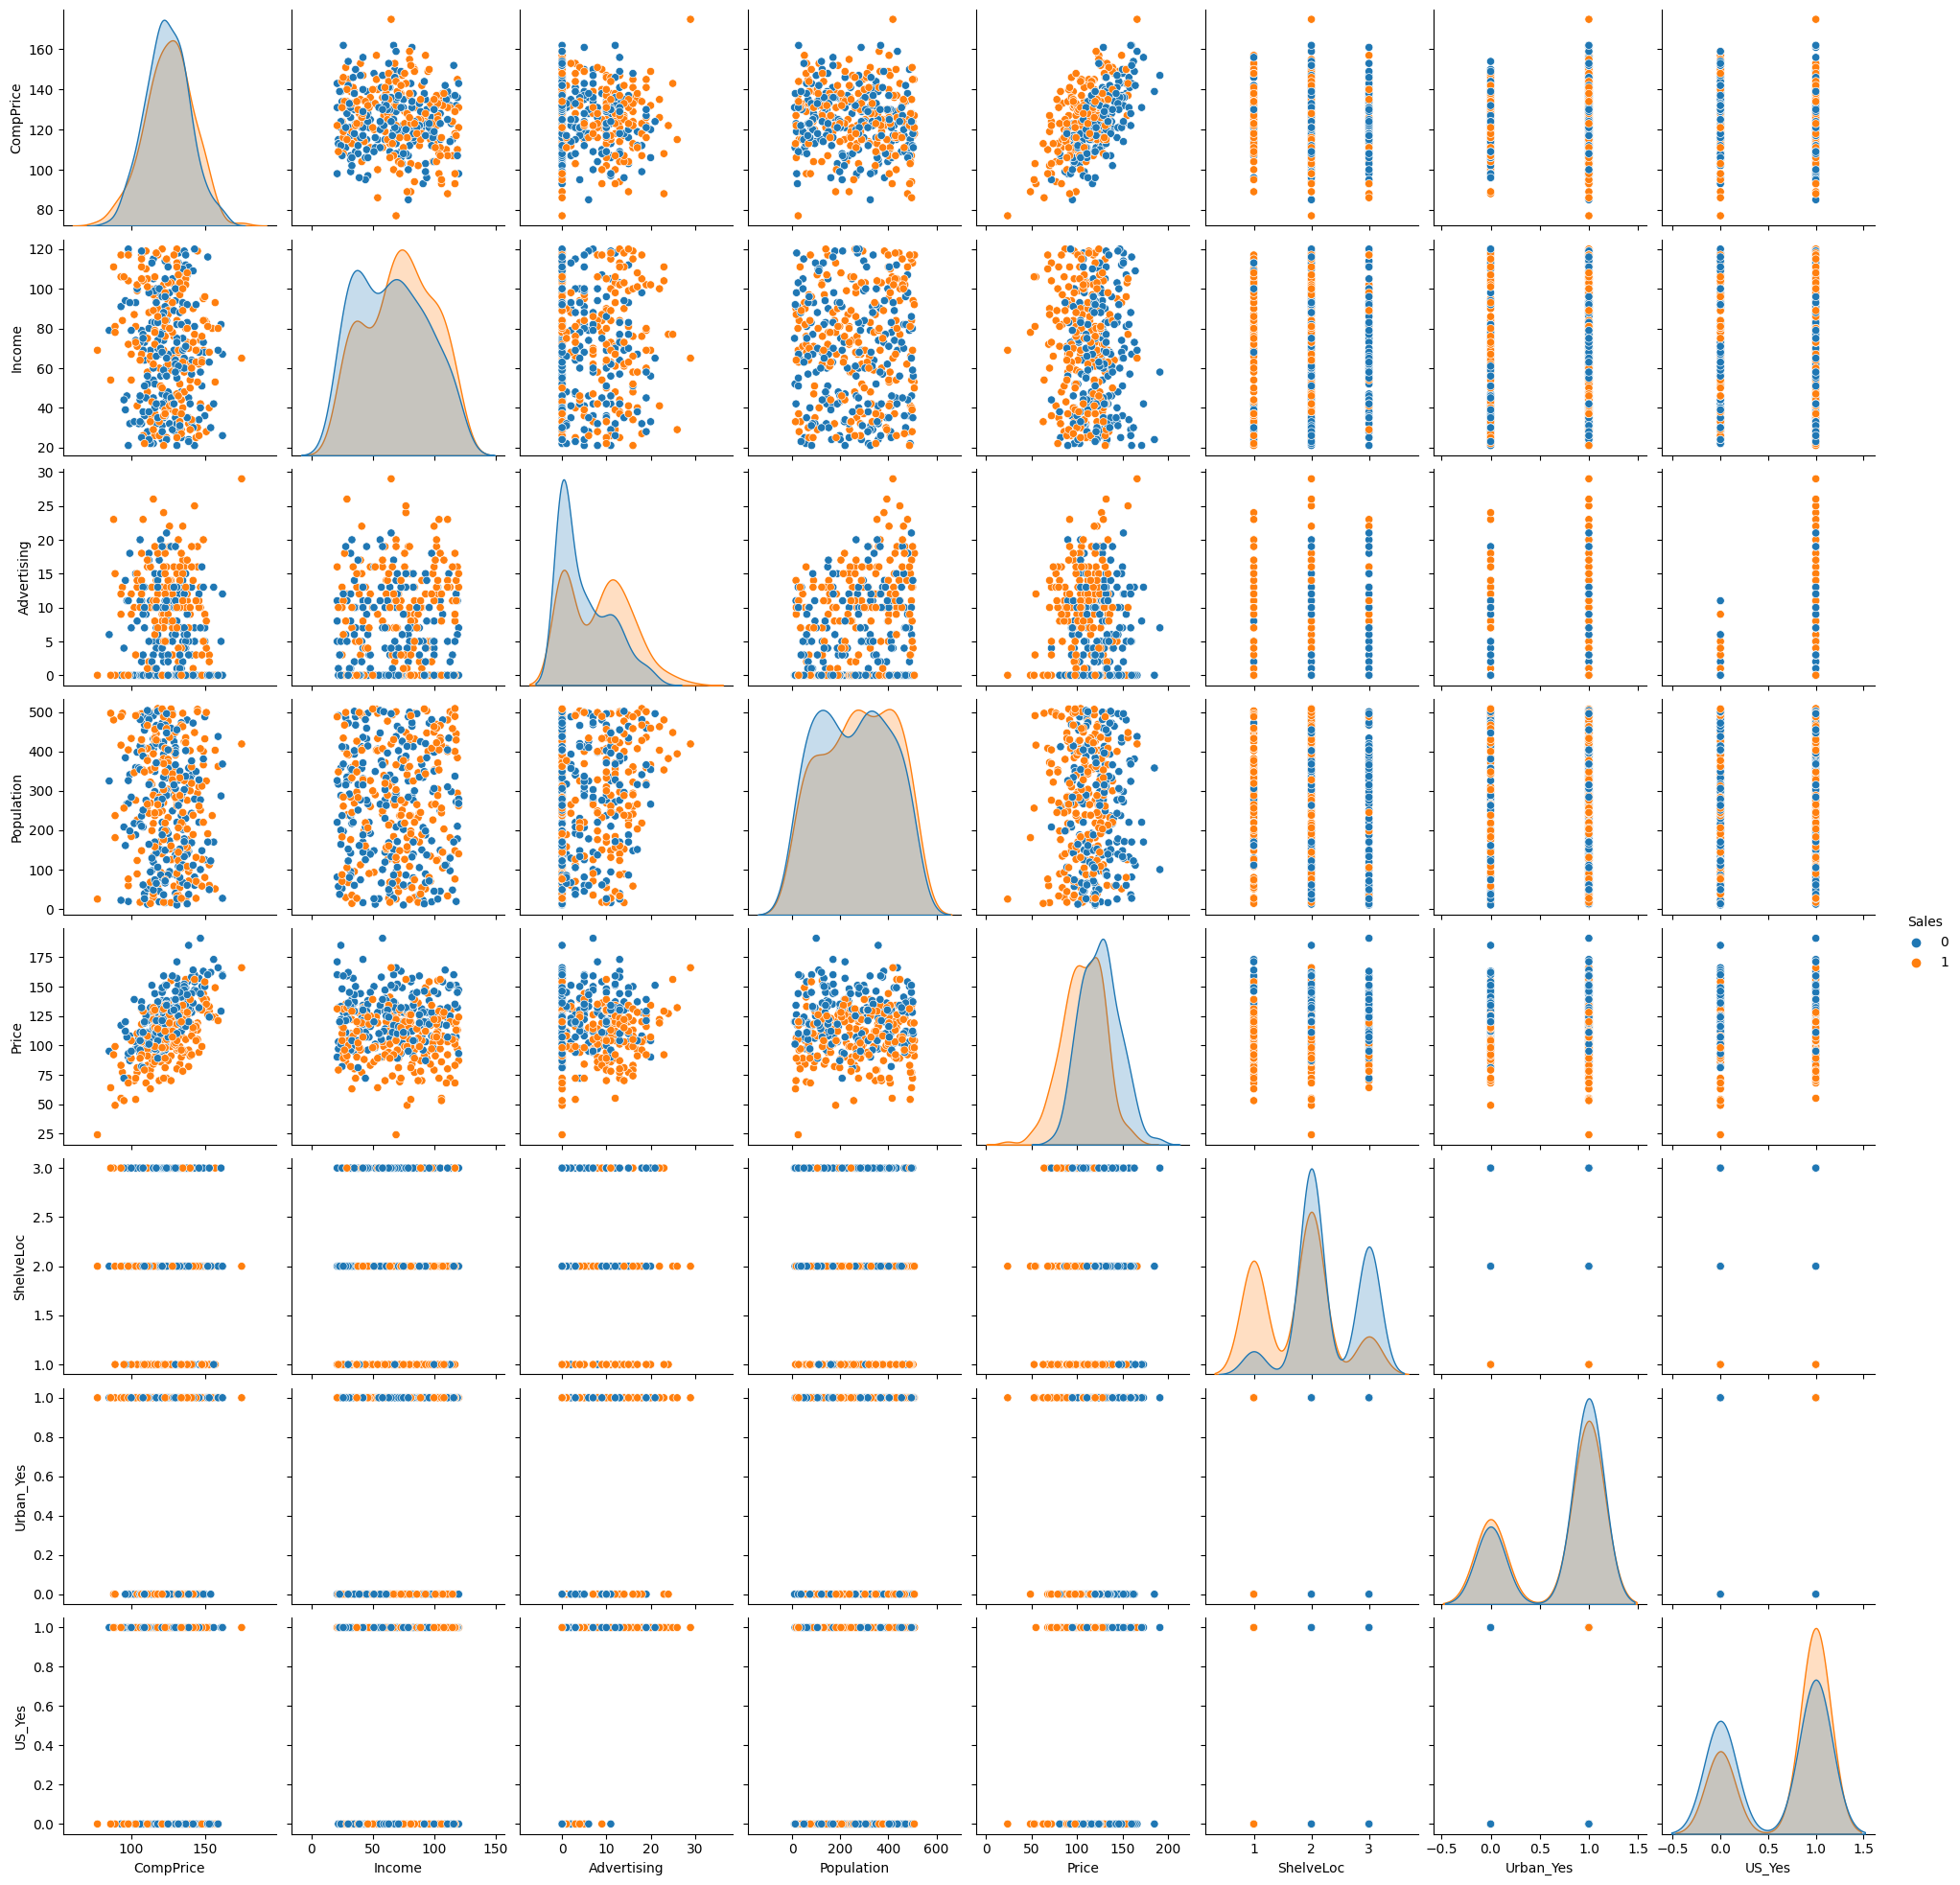

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Sales')

In [ ]:
x=df.iloc[:,1:]
y=df['Sales']

In [ ]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban_Yes,US_Yes
0,138,73,11,276,120,3,1,1
1,111,48,16,260,83,1,1,1
2,113,35,10,269,80,2,1,1
3,117,100,4,466,97,2,1,1
4,141,64,3,340,128,3,1,0
...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,1,1
396,139,23,3,37,120,2,0,1
397,162,26,12,368,159,2,1,1
398,100,79,7,284,95,3,1,1


In [ ]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [ ]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban_Yes,US_Yes
283,135,110,0,112,117,2,0,0
250,137,105,10,435,156,1,1,1
336,138,35,6,60,143,3,1,0
117,145,53,0,507,119,2,1,0
223,110,45,9,276,125,2,1,1
...,...,...,...,...,...,...,...,...
324,136,65,4,133,150,3,1,1
320,136,70,12,171,152,2,1,1
384,123,37,15,348,112,1,1,1
247,123,114,0,298,151,3,1,0


In [ ]:
y_train = y_train.round()
y_train

283    0
250    1
336    0
117    1
223    0
      ..
324    0
320    0
384    1
247    0
268    0
Name: Sales, Length: 320, dtype: int64

In [ ]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban_Yes,US_Yes
260,129,117,8,400,101,3,1,1
164,148,64,0,58,141,2,0,1
209,98,21,11,326,90,3,0,1
35,131,84,11,29,96,2,0,1
319,127,45,19,459,129,2,0,1
...,...,...,...,...,...,...,...,...
137,128,42,0,436,118,2,1,0
252,133,97,0,70,117,2,1,0
327,112,38,17,316,104,2,1,1
261,121,42,4,188,118,2,1,1


In [ ]:
y_test = y_test.round()
y_test

260    1
164    1
209    0
35     1
319    0
      ..
137    0
252    1
327    0
261    0
130    1
Name: Sales, Length: 80, dtype: int64

##**BUILDING DECISION TREE CLASSIFIER USING ENTROPY CRITERIA**

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
model.classes_

array([0, 1])

In [ ]:
from sklearn import tree

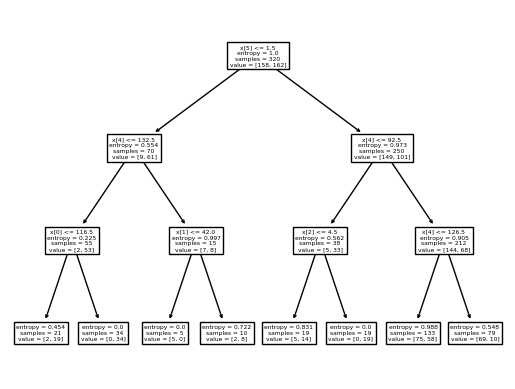

In [ ]:
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
x_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Urban_Yes', 'US_Yes'],
      dtype='object')

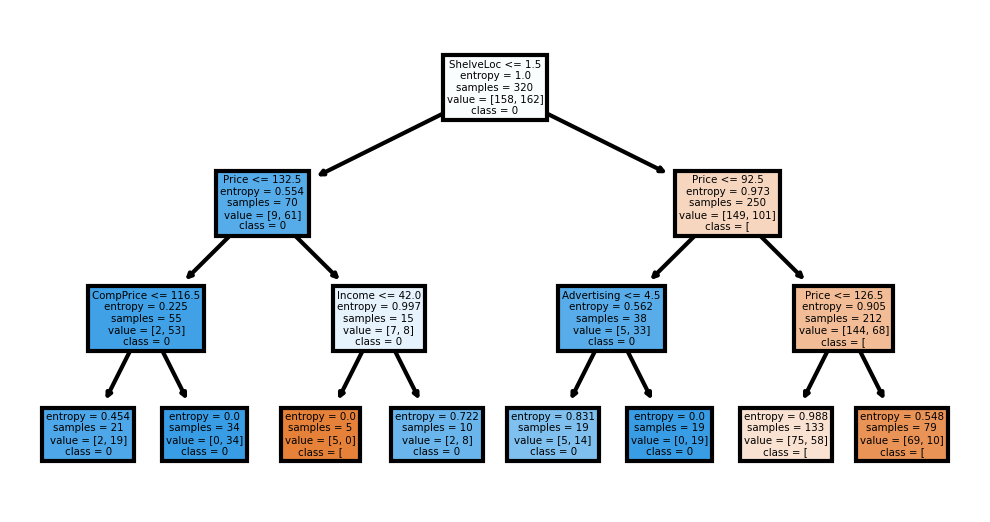

In [ ]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Urban_Yes', 'US_Yes']
cn=str([0,1])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,2), dpi=300)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

0    59
1    21
dtype: int64

In [ ]:
preds

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales,,
0,38,5
1,21,16


In [ ]:
# Accuracy
np.mean(preds==y_test)

0.675

##**BULDING DECISION TREE CLASSIFIER (CART) USING GINI CRITERIA**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

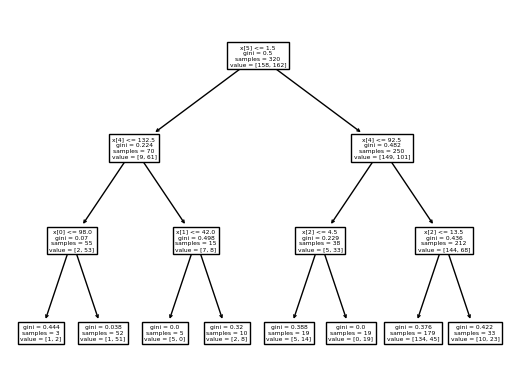

In [ ]:
tree.plot_tree(model_gini);

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)

0.675

##**DECISION TREE REGRESSON EXAMPLE**

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

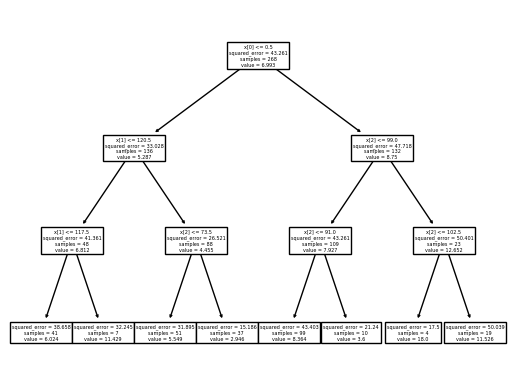

In [ ]:
tree.plot_tree(model);

In [ ]:
pred2=model.predict(X_test)
np.mean(pred2==y_test)

0.0

In [ ]:
model.score(X_test, y_test)

-0.03675420293172915